<a href="https://colab.research.google.com/github/srfinley/dataset/blob/master/DS_Storytelling_Boston_Marathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Columns:

Bib: Assigned race number based on qualifying time. "F" could appear for female elites.

Name: Name of runner (Last, First)


Age: Age on race day


M/F: Runner's gender

City: Runner's city of residence

State: Runner's state of residence (if applicable).

Country: Runner's country of residence

Citizen: Runner's nationality (optional)


5K: Runner's time at 5k

10K: Runner's time at 10k

15K: Runner's time at 15k

20K: Runner's time at 20k

Half: Runner's time at halfway point (21.0975)

25K: Runner's time at 25k

30K: Runner's time at 30k

35K: Runner's time at 35k

40K: Runner's time at 40k

Pace: Runner's overall minute per mile pace

Proj Time: Runner's projected time during the race (empty)

Official Time: Runner's official finishing time at 42.195k

Overall: Runner's overall raking

Gender: Runner's ranking in their gender

Division: Runner's ranking in their age division 

In [4]:
df15 = pd.read_csv("https://raw.githubusercontent.com/srfinley/dataset/master/marathon_results_2015.csv?token=ANCOJPKTBUCDJOJO4XCD3Y25RVNBK")

df15.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5


In [18]:
#examine data
print(df15.shape)
df15.describe()

(26598, 25)


,Unnamed: 0,Age,Overall,Gender,Division
count,26598.000000,26598.000000,26598.000000,26598.000000,26598.000000
mean,13298.500000,42.144823,13299.500000,6711.791263,1654.040417
std,7678.325566,11.294531,7678.325566,3944.254734,1477.112437
min,0.000000,18.000000,1.000000,1.000000,1.000000
25%,6649.250000,33.000000,6650.250000,3325.250000,518.000000
50%,13298.500000,42.000000,13299.500000,6650.000000,1205.000000
75%,19947.750000,50.000000,19948.750000,9974.750000,2268.000000
max,26597.000000,82.000000,26598.000000,14581.000000,6004.000000


In [19]:
df15.describe(exclude=np.number)

,Bib,Name,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time
count,26598,26598,26598,26598,24047,26598,1064,67,26598,26598,26598,26598,26598,26598,26598,26598,26598,26598,26598,26598
unique,26598,26540,2,5616,69,79,82,2,1328,2435,3480,4541,4746,5573,6545,7530,8380,555,1,8718
top,8100,"Morgan, John",M,Boston,MA,USA,CAN,VI,-,0:48:34,1:13:00,-,-,-,-,-,-,0:07:58,-,3:40:12
freq,1,3,14581,686,4694,21880,136,36,152,44,31,29,28,31,39,51,56,173,26598,15


In [5]:
#tidy tasks
#delete stupid colums:unnamed:0, unnamed:9, citizen (only 1064 obs), proj time

#should also delete pace column? only value that uses miles in the whole df

df15 = df15.drop(["Unnamed: 0","Citizen","Unnamed: 9","Proj Time"],axis=1)
df15.head()

,Bib,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,2:09:17,1,1,1
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,2:09:48,2,2,2
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,2:10:22,3,3,3
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,2:10:47,4,4,4
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,2:10:49,5,5,5


In [6]:
#rename columns to my satisfaction
df15 = df15.rename(columns = {
    'Bib': 'bib',
    'Name': 'name', 
    'Age': 'age', 
    'M/F': 'sex',
    'City': 'city',
    'State': 'state',
    'Country': 'country',
    '5K': '5k-15',
    '10K': '10k-15',
    '15K': '15k-15',
    '20K': '20k-15',
    'Half': 'half-15',
    '25K': '25k-15',
    '30K': '30k-15',
    '35K': '35k-15',
    '40K': '40k-15',
    'Pace': 'pace-15',
    'Official Time': 'final-15',
    'Overall': 'rank-15',
    'Gender': 'sexrank-15',
    'Division': 'agerank-15'
})

df15.head()

,bib,name,age,sex,city,state,country,5k-15,10k-15,15k-15,20k-15,half-15,25k-15,30k-15,35k-15,40k-15,pace-15,final-15,rank-15,sexrank-15,agerank-15
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,2:09:17,1,1,1
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,2:09:48,2,2,2
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,2:10:22,3,3,3
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,0:14:43,0:29:44,0:45:01,1:00:29,1:04:02,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,2:10:47,4,4,4
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,2:10:49,5,5,5


In [0]:
#function converts a race time (like one formatted as "hours:minutes:seconds") into a number of seconds
#by way of a timedelta object
def racetosecs(time):
  return pd.to_timedelta(time).seconds

In [8]:
#turn all the race times into numbers of seconds
racetimes = ['5k-15', '10k-15', '15k-15', '20k-15', 'half-15', '25k-15', 
             '30k-15', '35k-15', '40k-15', 'pace-15', 'final-15']

for column in racetimes:
  df15[column] = df15[column].apply(racetosecs)
  
df15.head()

,bib,name,age,sex,city,state,country,5k-15,10k-15,15k-15,20k-15,half-15,25k-15,30k-15,35k-15,40k-15,pace-15,final-15,rank-15,sexrank-15,agerank-15
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,883,1783,2697,3629,3842,4567,5520,6479,7359,296,7757,1,1,1
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,883,1783,2698,3628,3841,4567,5519,6479,7362,298,7788,2,2,2
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,883,1783,2697,3629,3842,4567,5520,6479,7381,299,7822,3,3,3
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,883,1784,2701,3629,3842,4567,5520,6483,7427,300,7847,4,4,4
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,883,1784,2698,3628,3841,4567,5520,6479,7407,300,7849,5,5,5


In [0]:
df15['40k-15'].describe() #min 0

count    26598.000000
mean     12807.554327
std       2362.863405
min          0.000000
25%      11246.000000
50%      12443.500000
75%      13950.000000
max      27688.000000
Name: 40k-15, dtype: float64

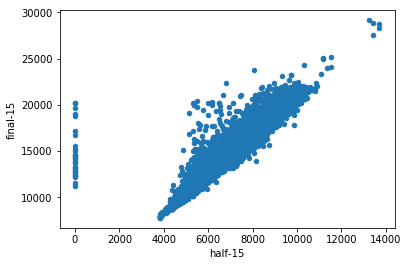

In [0]:
df15.plot.scatter('half-15','final-15'); #line of x=0 values

In [0]:
df15[df15['half-15'] == 0].shape #there are misleading zeros in the data!!

(28, 21)

In [0]:
df15[df15['half-15'] == 0]
#lots of zeroes dotted throughout the data -- many people who have one zero have multiple zeroes

,bib,name,age,sex,city,state,country,5k-15,10k-15,15k-15,20k-15,half-15,25k-15,30k-15,35k-15,40k-15,pace-15,final-15,rank-15,sexrank-15,agerank-15
3860,4535,"Fulton, Max",38,M,Denver,CO,USA,0,0,0,5150,0,0,0,0,0,0:07:07,11183,3861,3583,2476
4984,8311,"McBroom, Tiffany",27,F,Ripon,CA,USA,1313,2624,3933,0,0,0,0,0,0,0:07:19,11497,4985,477,419
7916,17122,"Schulte, Meg S.",43,F,Bloomfield,MI,USA,1454,2877,4316,5767,0,7198,8644,10117,11572,0:07:46,12195,7917,1410,139
8501,3790,"Katkus, Mykolas",36,M,Vilnius,NaN,LTU,1676,0,0,5871,0,7305,8802,10395,0,0:07:50,12306,8502,6854,3387
8846,11274,"Monterrubio, Monica",43,F,Naucalpan Estado de Mexico,NaN,MEX,1483,2872,4277,0,0,0,0,10136,11677,0:07:52,12374,8847,1804,193
10408,14513,"Hub, Erin A",20,F,Glen Cove,NY,USA,1648,0,0,5891,0,7366,8894,10498,12064,0:08:03,12647,10409,2535,2004
10979,10369,"Jessen, Stacy L",45,F,Austin,TX,USA,0,0,0,0,0,0,9167,10661,12123,0:08:07,12758,10980,2861,177
11479,29478,"Racicot, Emily A.",21,F,Weymouth,MA,USA,0,0,0,0,0,0,0,0,12138,0:08:10,12846,11480,3153,2409
12467,14906,"Evans, Sarah L",31,F,New York,NY,USA,0,0,0,6155,0,0,0,0,12306,0:08:17,13027,12468,3728,2763
12994,8007,"Emilio, Dave",47,M,Toronto,ON,CAN,0,0,0,0,0,0,0,0,0,0:19:48,13125,12995,8974,1728


In [9]:
#it may be that for some kinds of analysis the zero is better but let's try replacing with NaN
for column in racetimes:
  df15[column] = df15[column].replace({0:np.NaN})

df15.describe()
#from the counts, we can see that most checkpoints are missing tens of values
#they may or may not be *systemically* skewing the data, but at that magnitude it's hard to get worked up

,age,5k-15,10k-15,15k-15,20k-15,half-15,25k-15,30k-15,35k-15,40k-15,pace-15,final-15,rank-15,sexrank-15,agerank-15
count,26598.000000,26446.000000,26567.000000,26580.000000,26569.000000,26570.000000,26567.000000,26559.000000,26547.000000,26542.000000,26598.000000,26598.000000,26598.000000,26598.000000,26598.000000
mean,42.144823,1532.072563,3045.632025,4575.808728,6139.519214,6478.331050,7729.398314,9396.823186,11119.723057,12834.576520,518.681066,13585.590608,13299.500000,6711.791263,1654.040417
std,11.294531,242.351901,478.765720,728.671427,1000.958018,1057.534958,1294.715700,1622.323468,1961.892074,2290.867101,92.703053,2428.136597,7678.325566,3944.254734,1477.112437
min,18.000000,883.000000,1783.000000,2697.000000,3628.000000,3841.000000,4565.000000,5519.000000,6479.000000,7359.000000,296.000000,7757.000000,1.000000,1.000000,1.000000
25%,33.000000,1356.000000,2702.000000,4057.000000,5434.000000,5733.000000,6823.000000,8262.000000,9754.000000,11255.000000,455.000000,11918.000000,6650.250000,3325.250000,518.000000
50%,42.000000,1498.000000,2979.000000,4469.000000,5985.000000,6315.000000,7521.000000,9125.000000,10791.000000,12448.000000,503.000000,13180.000000,13299.500000,6650.000000,1205.000000
75%,50.000000,1658.000000,3299.000000,4958.000000,6649.000000,7017.000000,8374.000000,10190.000000,12074.500000,13956.750000,564.000000,14785.000000,19948.750000,9974.750000,2268.000000
max,82.000000,3183.000000,6436.000000,9705.000000,13027.000000,13701.000000,16566.000000,20624.000000,24691.000000,27688.000000,1188.000000,29161.000000,26598.000000,14581.000000,6004.000000


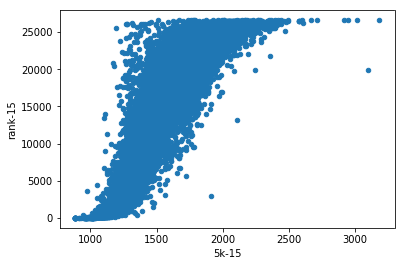

In [0]:
df15.plot.scatter('5k-15','rank-15');

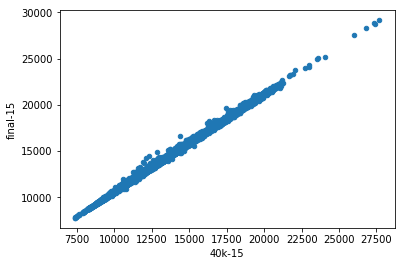

In [0]:
df15.plot.scatter('40k-15','final-15');

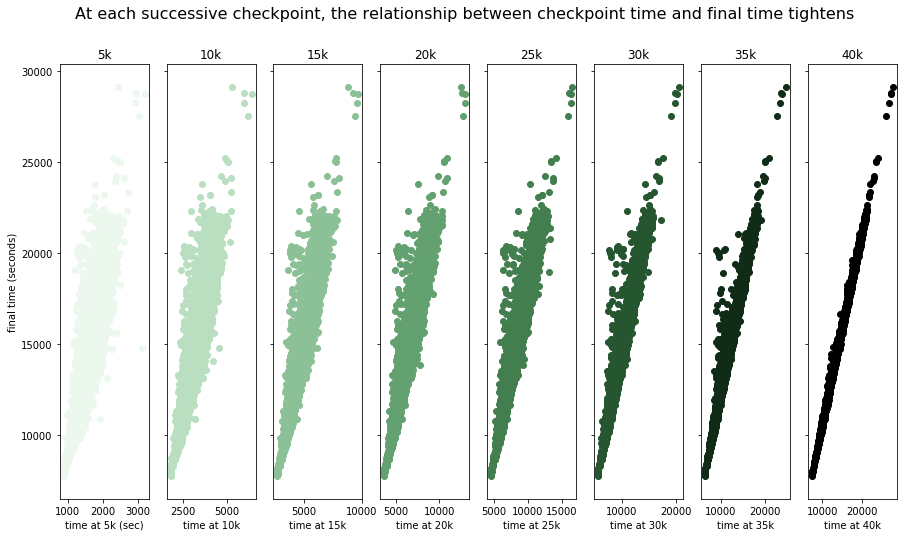

In [0]:
f, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(nrows=1,ncols=8,sharey=True)

f.set_size_inches(15,8)
f.suptitle("At each successive checkpoint, the relationship between checkpoint time and final time tightens",
          fontsize=16)
#plt.xlabel("Time at checkpoint") #doesn't center the label

ax1.scatter(df15['5k-15'],df15['final-15'],color='#ECF7EE')
ax1.set_title('5k')
ax1.set_ylabel('final time (seconds)')
ax1.set_xlabel('time at 5k (sec)')

ax2.scatter(df15['10k-15'],df15['final-15'],color='#B9DEC0')
ax2.set_title('10k')
ax2.set_xlabel("time at 10k")

ax3.scatter(df15['15k-15'],df15['final-15'],color='#8CC197')
ax3.set_title('15k')
ax3.set_xlabel('time at 15k')

ax4.scatter(df15['20k-15'],df15['final-15'],color='#64A171')
ax4.set_title('20k')
ax4.set_xlabel('time at 20k')

ax5.scatter(df15['25k-15'],df15['final-15'],color='#437E4F')
ax5.set_title('25k')
ax5.set_xlabel('time at 25k')

ax6.scatter(df15['30k-15'],df15['final-15'],color='#265630')
ax6.set_title('30k')
ax6.set_xlabel('time at 30k')

ax7.scatter(df15['35k-15'],df15['final-15'],color='#102C16')
ax7.set_title('35k')
ax7.set_xlabel('time at 35k')

ax8.scatter(df15['40k-15'],df15['final-15'],color='#000000')
ax8.set_title('40k')
ax8.set_xlabel('time at 40k')

plt.show();

Each of the eight plots represents the relationship between runners' final times (on the y axis) based on their times at a checkpoint (on the x axes). 

At its heart, this figure represents an intuitive truth: the more of the race you've run, the more your final time has already been determined. By the forty-kilometer mark (a marathon is 42.195 kilometers), there's hardly any time left to gain or lose.

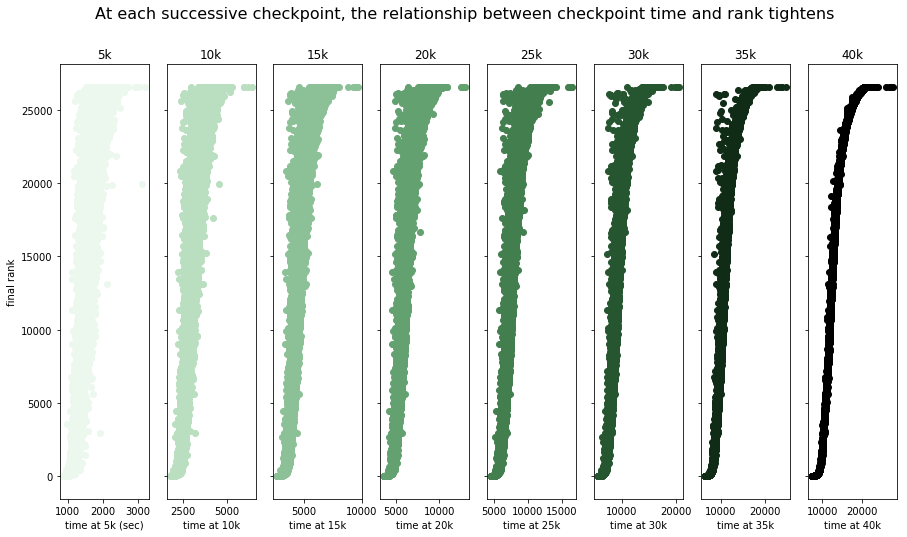

In [0]:
f, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(nrows=1,ncols=8,sharey=True)

f.set_size_inches(15,8)
f.suptitle("At each successive checkpoint, the relationship between checkpoint time and rank tightens",
          fontsize=16)
#plt.xlabel("Time at checkpoint")

ax1.scatter(df15['5k-15'],df15['rank-15'],color='#ECF7EE')
ax1.set_title('5k')
ax1.set_ylabel('final rank')
ax1.set_xlabel('time at 5k (sec)')

ax2.scatter(df15['10k-15'],df15['rank-15'],color='#B9DEC0')
ax2.set_title('10k')
ax2.set_xlabel("time at 10k")

ax3.scatter(df15['15k-15'],df15['rank-15'],color='#8CC197')
ax3.set_title('15k')
ax3.set_xlabel('time at 15k')

ax4.scatter(df15['20k-15'],df15['rank-15'],color='#64A171')
ax4.set_title('20k')
ax4.set_xlabel('time at 20k')

ax5.scatter(df15['25k-15'],df15['rank-15'],color='#437E4F')
ax5.set_title('25k')
ax5.set_xlabel('time at 25k')

ax6.scatter(df15['30k-15'],df15['rank-15'],color='#265630')
ax6.set_title('30k')
ax6.set_xlabel('time at 30k')

ax7.scatter(df15['35k-15'],df15['rank-15'],color='#102C16')
ax7.set_title('35k')
ax7.set_xlabel('time at 35k')

ax8.scatter(df15['40k-15'],df15['rank-15'],color='#000000')
ax8.set_title('40k')
ax8.set_xlabel('time at 40k')

plt.show();

The linear relationship between checkpoint time and final time is transformed into a striking sigmoid curve when final time is translated into final ranking. We might take this to mean that runners at extremes of ability -- the fastest and the slowest -- are more distinct from their immediate peers than those in the middle of the pack. That is, the fastest runner is faster by a greater amount than the second-fastest runner, compared to the difference between the ten thousandth fastest and the ten thousand and first fastest runner.

Although the linear relationship has disappeared, not all the information from the first figure has been lost; the five slowest runners, visible in the first figure as scattered outliers, are here visisble as a consistent mass at the top right end of the distribution, physically distinct from the contiguous mass formed by the other 26,592 points. 

We can also more easily track the impressive recovery of Alison Caruso, who evidently got off to a rough start -- at the 5k checkpoint, her time was 3100 seconds (~52 minutes), which more closely resembles the 5k checkpoint time of someone coming in 28,773rd, rather than Alison's final rank of 14,783. Her dot is clearly visible as it draws closer to the main mass in the first three plots, then finally integrates as her checkpoint times finally conform what we would expect based on her ranking.

In [0]:
#checking whether there's a numerically visible gap before the last few finishers
#there is -- prior gaps toward the end are on the order of hundreds of seconds
#but then there's a > two thousand second difference between Cedric and Prescott
df15.tail(10)

,bib,name,age,sex,city,state,country,5k-15,10k-15,15k-15,20k-15,half-15,25k-15,30k-15,35k-15,40k-15,pace-15,final-15,rank-15,sexrank-15,agerank-15
26588,25645,"Luckett, Kelly M.",47,F,Savannah,GA,USA,2602.0,5260.0,8016.0,10918.0,11536.0,13747.0,16913.0,20055.0,22980.0,920,24121,26589,12014,1832
26589,25655,"Rigsby, Scott",46,M,Atlanta,GA,USA,2366.0,4675.0,6956.0,9820.0,10294.0,12537.0,16264.0,19570.0,22963.0,926,24268,26590,14576,2485
26590,25647,"Loflin, Lindsay S.",71,M,Greensboro,NC,USA,2492.0,5071.0,7741.0,10540.0,11161.0,13469.0,16778.0,20083.0,23526.0,954,25007,26591,14577,123
26591,25481,"Gomez, Raymond",57,M,Arlington Heights,IL,USA,2392.0,5014.0,7709.0,10521.0,11146.0,13486.0,16721.0,19989.0,23625.0,957,25070,26592,14578,1498
26592,25650,"King, Cedric",37,M,Bethesda,MD,USA,2278.0,4938.0,7802.0,10918.0,11536.0,14169.0,17572.0,20929.0,24030.0,963,25230,26593,14579,4964
26593,25656,"Prescott, Francine J.",64,F,Boynton Beach,FL,USA,3015.0,6211.0,9413.0,12746.0,13426.0,15953.0,19184.0,22639.0,26014.0,1051,27536,26594,12015,269
26594,31359,"Emerson, Annette C.",61,F,Old Town,ME,USA,2916.0,5979.0,9553.0,12958.0,13675.0,16364.0,19918.0,23336.0,26779.0,1079,28290,26595,12016,270
26595,25559,"Cerveny, Nona",66,F,Scottsdale,AZ,USA,3183.0,6436.0,9705.0,13027.0,13701.0,16431.0,20336.0,23931.0,27378.0,1098,28773,26596,12017,91
26596,29396,"Buccilli, Alfred P.",53,M,Lynnfield,MA,USA,2944.0,6012.0,9211.0,12701.0,13415.0,16160.0,19871.0,23615.0,27338.0,1100,28837,26597,14580,2055
26597,25651,"Reilly, William",62,M,Kew Garden,NY,USA,2414.0,5298.0,8806.0,12521.0,13236.0,16566.0,20624.0,24691.0,27688.0,1113,29161,26598,14581,898


In [0]:
#it's easy to identify Alison as the best-placing person with such a high 5k checkpoint time
df15[df15['5k-15'] > 3000]

,bib,name,age,sex,city,state,country,5k-15,10k-15,15k-15,20k-15,half-15,25k-15,30k-15,35k-15,40k-15,pace-15,final-15,rank-15,sexrank-15,agerank-15
19945,14729,"Caruso, Alison H.",37,F,Bolton,CT,USA,3100.0,4579.0,6090.0,7709.0,8053.0,9279.0,10957.0,12662.0,14357.0,564,14783,19946,8221,4389
26593,25656,"Prescott, Francine J.",64,F,Boynton Beach,FL,USA,3015.0,6211.0,9413.0,12746.0,13426.0,15953.0,19184.0,22639.0,26014.0,1051,27536,26594,12015,269
26595,25559,"Cerveny, Nona",66,F,Scottsdale,AZ,USA,3183.0,6436.0,9705.0,13027.0,13701.0,16431.0,20336.0,23931.0,27378.0,1098,28773,26596,12017,91


#Interval and cumulative pace analysis

In [10]:
#new feature: overall pace at each checkpoint (cumulative)
#this pace feature will be m/sec
#by calculating km/sec initially and then multiplying by 1000 (thanks, metric system)
#this way, we have a more intuitive sense of the speed involved
#and retain our intuition that a larger number is "better"/faster


df15['cp-5k-15'] = 5 / df15['5k-15'] * 1000
df15['cp-10k-15'] = 10 / df15['10k-15'] * 1000
df15['cp-15k-15'] = 15 / df15['15k-15'] * 1000
df15['cp-20k-15'] = 20 / df15['20k-15'] * 1000
df15['cp-25k-15'] = 25 / df15['25k-15'] * 1000
df15['cp-30k-15'] = 30 / df15['30k-15'] * 1000
df15['cp-35k-15'] = 35 / df15['35k-15'] * 1000
df15['cp-40k-15'] = 40 / df15['40k-15'] * 1000
df15['cp-final-15'] = 42.195 / df15['final-15'] * 1000

df15.head()
#initial observation: the top c-paces only start to diverge toward the end of the marathon

,bib,name,age,sex,city,state,country,5k-15,10k-15,15k-15,20k-15,half-15,25k-15,30k-15,35k-15,40k-15,pace-15,final-15,rank-15,sexrank-15,agerank-15,cp-5k-15,cp-10k-15,cp-15k-15,cp-20k-15,cp-25k-15,cp-30k-15,cp-35k-15,cp-40k-15,cp-final-15
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,883.0,1783.0,2697.0,3629.0,3842.0,4567.0,5520.0,6479.0,7359.0,296,7757,1,1,1,5.662514,5.608525,5.561735,5.511160,5.474053,5.434783,5.402068,5.435521,5.439603
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,883.0,1783.0,2698.0,3628.0,3841.0,4567.0,5519.0,6479.0,7362.0,298,7788,2,2,2,5.662514,5.608525,5.559674,5.512679,5.474053,5.435767,5.402068,5.433306,5.417951
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,883.0,1783.0,2697.0,3629.0,3842.0,4567.0,5520.0,6479.0,7381.0,299,7822,3,3,3,5.662514,5.608525,5.561735,5.511160,5.474053,5.434783,5.402068,5.419320,5.394400
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,883.0,1784.0,2701.0,3629.0,3842.0,4567.0,5520.0,6483.0,7427.0,300,7847,4,4,4,5.662514,5.605381,5.553499,5.511160,5.474053,5.434783,5.398735,5.385755,5.377214
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,883.0,1784.0,2698.0,3628.0,3841.0,4567.0,5520.0,6479.0,7407.0,300,7849,5,5,5,5.662514,5.605381,5.559674,5.512679,5.474053,5.434783,5.402068,5.400297,5.375844


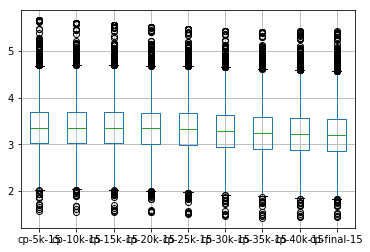

In [19]:
df15.boxplot(['cp-5k-15','cp-10k-15','cp-15k-15','cp-20k-15','cp-25k-15',
              'cp-30k-15','cp-35k-15','cp-40k-15','cp-final-15']);

In [22]:
#new new feature: non-cumulative pace (for just the previous 5km)
#in m/sec

df15['p-5k-15'] = df15['cp-5k-15'] #for the first five km, pace and cumulative pace are the same
df15['p-10k-15'] = 5 / (df15['10k-15'] - df15['5k-15']) * 1000 #10k time - 5k time = time spent traversing kms 6-10
df15['p-15k-15'] = 5 / (df15['15k-15'] - df15['10k-15']) * 1000
df15['p-20k-15'] = 5 / (df15['20k-15'] - df15['15k-15']) * 1000
df15['p-25k-15'] = 5 / (df15['25k-15'] - df15['20k-15']) * 1000
df15['p-30k-15'] = 5 / (df15['30k-15'] - df15['25k-15']) * 1000
df15['p-35k-15'] = 5 / (df15['35k-15'] - df15['30k-15']) * 1000
df15['p-40k-15'] = 5 / (df15['40k-15'] - df15['35k-15']) * 1000
df15['p-final-15'] = 2.195 / (df15['final-15'] - df15['40k-15']) * 1000

df15.head()

,bib,name,age,sex,city,state,country,5k-15,10k-15,15k-15,20k-15,half-15,25k-15,30k-15,35k-15,40k-15,pace-15,final-15,rank-15,sexrank-15,agerank-15,cp-5k-15,cp-10k-15,cp-15k-15,cp-20k-15,cp-25k-15,cp-30k-15,cp-35k-15,cp-40k-15,cp-final-15,p-5k-15,p-10k-15,p-15k-15,p-20k-15,p-25k-15,p-30k-15,p-35k-15,p-40k-15,p-final-15
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,883.0,1783.0,2697.0,3629.0,3842.0,4567.0,5520.0,6479.0,7359.0,296,7757,1,1,1,5.662514,5.608525,5.561735,5.511160,5.474053,5.434783,5.402068,5.435521,5.439603,5.662514,5.555556,5.470460,5.364807,5.330490,5.246590,5.213764,5.681818,5.515075
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,883.0,1783.0,2698.0,3628.0,3841.0,4567.0,5519.0,6479.0,7362.0,298,7788,2,2,2,5.662514,5.608525,5.559674,5.512679,5.474053,5.435767,5.402068,5.433306,5.417951,5.662514,5.555556,5.464481,5.376344,5.324814,5.252101,5.208333,5.662514,5.152582
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,883.0,1783.0,2697.0,3629.0,3842.0,4567.0,5520.0,6479.0,7381.0,299,7822,3,3,3,5.662514,5.608525,5.561735,5.511160,5.474053,5.434783,5.402068,5.419320,5.394400,5.662514,5.555556,5.470460,5.364807,5.330490,5.246590,5.213764,5.543237,4.977324
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,883.0,1784.0,2701.0,3629.0,3842.0,4567.0,5520.0,6483.0,7427.0,300,7847,4,4,4,5.662514,5.605381,5.553499,5.511160,5.474053,5.434783,5.398735,5.385755,5.377214,5.662514,5.549390,5.452563,5.387931,5.330490,5.246590,5.192108,5.296610,5.226190
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,883.0,1784.0,2698.0,3628.0,3841.0,4567.0,5520.0,6479.0,7407.0,300,7849,5,5,5,5.662514,5.605381,5.559674,5.512679,5.474053,5.434783,5.402068,5.400297,5.375844,5.662514,5.549390,5.470460,5.376344,5.324814,5.246590,5.213764,5.387931,4.966063


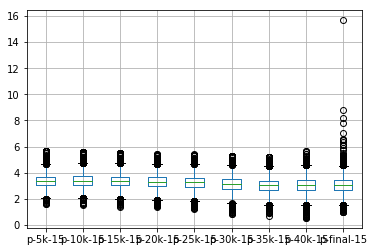

In [33]:
df15.boxplot(['p-5k-15','p-10k-15','p-15k-15','p-20k-15','p-25k-15',
              'p-30k-15','p-35k-15','p-40k-15','p-final-15'],
            labels=['5k','10k','15k','20k','25k',
              '30k','35k','40k','final']);

#WOW look at those outliers on the final few km!!

In [52]:
df15[df15['p-final-15'] > 7]
#Andy Palmer!
#sanity check suggests something's wrong here -- 15.7 meters per second is 35 miles per hour, 
#which is FASTER THAN USAIN BOLT HAS EVER BEEN RECORDED RUNNING

#Steven Wong's next-highest last-stretch pace of 8.8 meters per second (19.7 miles per hour) 
#is way more reasonable-seeming

,bib,name,age,sex,city,state,country,5k-15,10k-15,15k-15,20k-15,half-15,25k-15,30k-15,35k-15,40k-15,pace-15,final-15,rank-15,sexrank-15,agerank-15,cp-5k-15,cp-10k-15,cp-15k-15,cp-20k-15,cp-25k-15,cp-30k-15,cp-35k-15,cp-40k-15,cp-final-15,p-5k-15,p-10k-15,p-15k-15,p-20k-15,p-25k-15,p-30k-15,p-35k-15,p-40k-15,p-final-15
2949,30877,"Palmer, Andy",30,M,Auckland,NaN,NZL,1914.0,3179.0,4419.0,5700.0,5963.0,6928.0,8189.0,9462.0,10754.0,416,10894,2950,2782,2023,2.612330,3.145643,3.394433,3.508772,3.608545,3.663451,3.699007,3.719546,3.873233,2.612330,3.952569,4.032258,3.903201,4.071661,3.965107,3.927730,3.869969,15.678571
3050,953,"Gyr, Kiran A.",38,M,Richardson,TX,USA,1563.0,2872.0,4152.0,5443.0,5727.0,6744.0,8052.0,9373.0,10658.0,417,10925,3051,2871,2087,3.198976,3.481894,3.612717,3.674444,3.706999,3.725782,3.734130,3.753049,3.862243,3.198976,3.819710,3.906250,3.872967,3.843198,3.822630,3.785011,3.891051,8.220974
5612,7171,"Wong, Steven S",40,M,Mountain View,CA,USA,1722.0,3110.0,4520.0,6056.0,6343.0,7363.0,8738.0,10110.0,11404.0,445,11653,5613,4977,975,2.903600,3.215434,3.318584,3.302510,3.395355,3.433280,3.461919,3.507541,3.620956,2.903600,3.602305,3.546099,3.255208,3.825555,3.636364,3.644315,3.863988,8.815261
6666,14625,"Trout, Christina",32,F,San Diego,CA,USA,1678.0,3060.0,4455.0,5850.0,6156.0,7255.0,8697.0,10165.0,11609.0,455,11922,6667,951,808,2.979738,3.267974,3.367003,3.418803,3.445899,3.449465,3.443187,3.445603,3.539255,2.979738,3.617945,3.584229,3.584229,3.558719,3.467406,3.405995,3.462604,7.012780
21845,30533,"Sunderland, Jake",37,M,Taunton,MA,USA,2356.0,4252.0,6152.0,8088.0,8475.0,9890.0,11772.0,13606.0,15314.0,595,15595,21846,12487,4379,2.122241,2.351834,2.438231,2.472799,2.527806,2.548420,2.572395,2.611989,2.705675,2.122241,2.637131,2.631579,2.582645,2.774695,2.656748,2.726281,2.927400,7.811388


In [53]:
df15.loc[19945]
#there's our girl Alison, with an ever-increasing cumulative pace!
#

bib                        14729
name           Caruso, Alison H.
age                           37
sex                            F
city                      Bolton
state                         CT
country                      USA
5k-15                       3100
10k-15                      4579
15k-15                      6090
20k-15                      7709
half-15                     8053
25k-15                      9279
30k-15                     10957
35k-15                     12662
40k-15                     14357
pace-15                      564
final-15                   14783
rank-15                    19946
sexrank-15                  8221
agerank-15                  4389
cp-5k-15                  1.6129
cp-10k-15                2.18388
cp-15k-15                2.46305
cp-20k-15                2.59437
cp-25k-15                2.69426
cp-30k-15                2.73798
cp-35k-15                2.76418
cp-40k-15                 2.7861
cp-final-15              2.85429
p-5k-15   

In [48]:
#propagation of nan values means we're missing more non-cumulative paces than we otherwise might,
#but I'm still not too worried about that throwing anything off
df15.isnull().sum()

bib               0
name              0
age               0
sex               0
city              0
state          2551
country           0
5k-15           152
10k-15           31
15k-15           18
20k-15           29
half-15          28
25k-15           31
30k-15           39
35k-15           51
40k-15           56
pace-15           0
final-15          0
rank-15           0
sexrank-15        0
agerank-15        0
cp-5k-15        152
cp-10k-15        31
cp-15k-15        18
cp-20k-15        29
cp-25k-15        31
cp-30k-15        39
cp-35k-15        51
cp-40k-15        56
cp-final-15       0
p-5k-15         152
p-10k-15        167
p-15k-15         36
p-20k-15         37
p-25k-15         46
p-30k-15         55
p-35k-15         76
p-40k-15         93
p-final-15       56
dtype: int64

# Unused Analysis

In [9]:
#are non-Americans better than Americans?
#didn't end up including this in the analysis

df15us = df15[df15['country'] == 'USA']

df15us.head()

,bib,name,age,sex,city,state,country,5k-15,10k-15,15k-15,20k-15,half-15,25k-15,30k-15,35k-15,40k-15,pace-15,final-15,rank-15,sexrank-15,agerank-15
6,14,"Ritzenhein, Dathan",32,M,Rockford,MI,USA,885.0,1785.0,2720.0,3643.0,3843.0,4565.0,5519.0,6486.0,7445.0,301,7880,7,7,7
7,1,"Keflezighi, Meb",39,M,San Diego,CA,USA,884.0,1784.0,2699.0,3630.0,3842.0,4567.0,5519.0,6479.0,7498.0,304,7962,8,8,8
10,22,"Tegenkamp, Matt",33,M,Portland,OR,USA,886.0,1790.0,2733.0,3680.0,3888.0,4628.0,5592.0,6592.0,7615.0,307,8032,11,11,11
11,19,"Eggleston, Jeffrey",30,M,Boulder,CO,USA,914.0,1834.0,2766.0,3702.0,3907.0,4639.0,5610.0,6612.0,7607.0,308,8057,12,12,12
13,20,"Arciniaga, Nicholas",31,M,Flagstaff,AZ,USA,884.0,1784.0,2714.0,3667.0,3875.0,4670.0,5743.0,6813.0,7840.0,316,8282,14,14,14


In [10]:
df15for = df15[df15['country'] != 'USA']

df15for.head()

,bib,name,age,sex,city,state,country,5k-15,10k-15,15k-15,20k-15,half-15,25k-15,30k-15,35k-15,40k-15,pace-15,final-15,rank-15,sexrank-15,agerank-15
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,883.0,1783.0,2697.0,3629.0,3842.0,4567.0,5520.0,6479.0,7359.0,296,7757,1,1,1
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,883.0,1783.0,2698.0,3628.0,3841.0,4567.0,5519.0,6479.0,7362.0,298,7788,2,2,2
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,883.0,1783.0,2697.0,3629.0,3842.0,4567.0,5520.0,6479.0,7381.0,299,7822,3,3,3
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,883.0,1784.0,2701.0,3629.0,3842.0,4567.0,5520.0,6483.0,7427.0,300,7847,4,4,4
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,883.0,1784.0,2698.0,3628.0,3841.0,4567.0,5520.0,6479.0,7407.0,300,7849,5,5,5


In [0]:
stats.ttest_ind(df15us['final-15'], df15for['final-15'], nan_policy='omit')
#there is a highly statistically significant difference between completion times of americans vs foreigners
#makes sense -- if you travel internationally for marathons, you're likely to be a more serious marathoner
#than someone who travels domestically for marathons

Ttest_indResult(statistic=11.410682754540714, pvalue=4.345341291883695e-30)

In [12]:
#on that note -- are Bostonians different from other Americans?
df15bos = df15us[df15us['city'] == 'Boston']

print(df15bos.shape)
df15bos.head()

(686, 21)


,bib,name,age,sex,city,state,country,5k-15,10k-15,15k-15,20k-15,half-15,25k-15,30k-15,35k-15,40k-15,pace-15,final-15,rank-15,sexrank-15,agerank-15
115,407,"Bond, Robert J.",26,M,Boston,MA,USA,1102.0,2183.0,3267.0,4347.0,4580.0,5422.0,6513.0,7617.0,8704.0,351,9183,116,105,98
122,164,"Cummings, Cameron M.",33,M,Boston,MA,USA,988.0,2021.0,3087.0,4184.0,4420.0,5288.0,6419.0,7592.0,8725.0,352,9215,123,112,105
139,137,"Klecker, Jack R",23,M,Boston,MA,USA,1121.0,2219.0,3324.0,4419.0,4659.0,5521.0,6623.0,7721.0,8793.0,355,9282,140,129,120
194,518,"Neill, Ian T",30,M,Boston,MA,USA,1124.0,2231.0,3348.0,4456.0,4699.0,5560.0,6689.0,7833.0,8968.0,361,9446,195,183,167
291,3324,"Fitzpatrick, Michael",37,M,Boston,MA,USA,1136.0,2237.0,3362.0,4508.0,4760.0,5660.0,6821.0,7980.0,9116.0,368,9630,292,278,256


In [13]:
df15nb = df15us[df15us['city'] != 'Boston']

print(df15nb.shape)
df15nb.head()

(21194, 21)


,bib,name,age,sex,city,state,country,5k-15,10k-15,15k-15,20k-15,half-15,25k-15,30k-15,35k-15,40k-15,pace-15,final-15,rank-15,sexrank-15,agerank-15
6,14,"Ritzenhein, Dathan",32,M,Rockford,MI,USA,885.0,1785.0,2720.0,3643.0,3843.0,4565.0,5519.0,6486.0,7445.0,301,7880,7,7,7
7,1,"Keflezighi, Meb",39,M,San Diego,CA,USA,884.0,1784.0,2699.0,3630.0,3842.0,4567.0,5519.0,6479.0,7498.0,304,7962,8,8,8
10,22,"Tegenkamp, Matt",33,M,Portland,OR,USA,886.0,1790.0,2733.0,3680.0,3888.0,4628.0,5592.0,6592.0,7615.0,307,8032,11,11,11
11,19,"Eggleston, Jeffrey",30,M,Boulder,CO,USA,914.0,1834.0,2766.0,3702.0,3907.0,4639.0,5610.0,6612.0,7607.0,308,8057,12,12,12
13,20,"Arciniaga, Nicholas",31,M,Flagstaff,AZ,USA,884.0,1784.0,2714.0,3667.0,3875.0,4670.0,5743.0,6813.0,7840.0,316,8282,14,14,14


In [14]:
stats.ttest_ind(df15bos['final-15'], df15nb['final-15'])
#there's an even bigger and more significant difference!

Ttest_indResult(statistic=16.96303037568281, pvalue=3.9645808983994496e-64)

In [0]:
#I was considering doing an analysis across all three years of people who participated each time 
#what follows is the test I did of merging the three dataframes
#(conducted prior to renaming the columns of df15)
df16 = pd.read_csv("/content/marathon_results_2016.csv")

df16.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:47,0:31:20,0:47:07,1:03:14,1:06:45,1:19:15,1:34:17,1:50:24,2:05:59,0:05:04,2:12:45,2:12:45,1,1,1
1,1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,NaN,0:15:47,0:31:21,0:47:08,1:03:14,1:06:46,1:19:15,1:34:17,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2
2,6,"Tsegay, Yemane Adhane",31,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:46,0:31:20,0:47:07,1:03:13,1:06:44,1:19:15,1:34:45,1:50:48,2:06:47,0:05:07,2:14:02,2:14:02,3,3,3
3,11,"Korir, Wesley",33,M,Kitale,NaN,KEN,NaN,NaN,0:15:46,0:31:21,0:47:07,1:03:14,1:06:46,1:19:16,1:34:45,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4
4,14,"Lonyangata, Paul",23,M,Eldoret,NaN,KEN,NaN,NaN,0:15:46,0:31:21,0:47:08,1:03:14,1:06:46,1:19:18,1:34:46,1:51:30,2:08:11,0:05:11,2:15:45,2:15:45,5,5,5


In [0]:
df17 = pd.read_csv("/content/marathon_results_2017.csv")

df17.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,0:15:25,0:30:28,0:45:44,1:01:15,1:04:35,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,0:15:24,0:30:27,0:45:44,1:01:15,1:04:35,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,0:15:25,0:30:29,0:45:44,1:01:16,1:04:36,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,0:15:25,0:30:29,0:45:44,1:01:19,1:04:45,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,0:15:25,0:30:28,0:45:44,1:01:15,1:04:35,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5


In [0]:
#to avoid the problem of people potentially having the same names as each other
#(Three John Morgans ran in 2015!)
#I decided to create the feature 'age in 2015' for the 2016 and 2017 datasets
#to use as a second column to merge on

#the Boston Marathon isn't consistently held on the same exact date, 
#so there's a risk of losing some April babies
#but I considered age a better choice than city or country

df16['age-in-2015'] = df16['Age'] - 1

df16.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,age-in-2015
0,5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:47,0:31:20,0:47:07,1:03:14,1:06:45,1:19:15,1:34:17,1:50:24,2:05:59,0:05:04,2:12:45,2:12:45,1,1,1,20
1,1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,NaN,0:15:47,0:31:21,0:47:08,1:03:14,1:06:46,1:19:15,1:34:17,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2,25
2,6,"Tsegay, Yemane Adhane",31,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:46,0:31:20,0:47:07,1:03:13,1:06:44,1:19:15,1:34:45,1:50:48,2:06:47,0:05:07,2:14:02,2:14:02,3,3,3,30
3,11,"Korir, Wesley",33,M,Kitale,NaN,KEN,NaN,NaN,0:15:46,0:31:21,0:47:07,1:03:14,1:06:46,1:19:16,1:34:45,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4,32
4,14,"Lonyangata, Paul",23,M,Eldoret,NaN,KEN,NaN,NaN,0:15:46,0:31:21,0:47:08,1:03:14,1:06:46,1:19:18,1:34:46,1:51:30,2:08:11,0:05:11,2:15:45,2:15:45,5,5,5,22


In [0]:
df17['age-in-2015'] = df17['Age'] - 2

df17.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,age-in-2015
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,0:15:25,0:30:28,0:45:44,1:01:15,1:04:35,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1,22
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,0:15:24,0:30:27,0:45:44,1:01:15,1:04:35,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2,28
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,0:15:25,0:30:29,0:45:44,1:01:16,1:04:36,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3,23
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,0:15:25,0:30:29,0:45:44,1:01:19,1:04:45,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4,30
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,0:15:25,0:30:28,0:45:44,1:01:15,1:04:35,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5,29


In [0]:
merged = pd.merge(df15, df16, how='inner',
              left_on=['Name','Age'], right_on=['Name','age-in-2015'])

print(merged.shape)
merged.head()

(5458, 49)


,Unnamed: 0,Bib_x,Name,Age_x,M/F_x,City_x,State_x,Country_x,Citizen_x,Unnamed: 9,5K_x,10K_x,15K_x,20K_x,Half_x,25K_x,30K_x,35K_x,40K_x,Pace_x,Proj Time_x,Official Time_x,Overall_x,Gender_x,Division_x,Bib_y,Age_y,M/F_y,City_y,State_y,Country_y,Citizen_y,Unnamed: 8,5K_y,10K_y,15K_y,20K_y,Half_y,25K_y,30K_y,35K_y,40K_y,Pace_y,Proj Time_y,Official Time_y,Overall_y,Gender_y,Division_y,age-in-2015
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:57,1:00:29,1:04:02,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,1,26,M,Ambo,NaN,ETH,NaN,NaN,0:15:47,0:31:21,0:47:08,1:03:14,1:06:46,1:19:15,1:34:17,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2,25
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,0:44:58,1:00:28,1:04:01,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,6,31,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:46,0:31:20,0:47:07,1:03:13,1:06:44,1:19:15,1:34:45,1:50:48,2:06:47,0:05:07,2:14:02,2:14:02,3,3,3,30
2,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,11,33,M,Kitale,NaN,KEN,NaN,NaN,0:15:46,0:31:21,0:47:07,1:03:14,1:06:46,1:19:16,1:34:45,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4,32
3,27,78,"Mercier, Christian",40,M,Quebec,QC,CAN,NaN,NaN,0:16:08,0:32:23,0:49:15,1:06:56,1:10:46,1:24:22,1:42:01,1:59:56,2:17:08,0:05:31,-,2:24:37,28,28,2,77,41,M,Quebec,QC,CAN,NaN,NaN,0:16:39,0:33:45,0:51:22,1:09:41,1:13:38,1:28:03,1:47:32,2:07:20,2:26:05,0:05:54,2:34:30,2:34:30,63,56,4,40
4,33,F1,"Deba, Buzunesh",27,F,Arsi,NaN,ETH,NaN,NaN,0:16:57,0:34:23,0:51:49,1:09:01,1:12:45,1:26:09,1:43:24,2:00:50,2:17:30,0:05:33,-,2:25:09,34,3,3,F3,28,F,Arsi,NaN,ETH,NaN,NaN,0:18:22,0:36:20,0:54:00,1:11:44,1:15:33,1:29:28,1:47:30,2:07:03,2:25:30,0:05:53,2:33:56,2:33:56,56,7,7,27


In [0]:
df = pd.merge(merged, df17, how='inner',
              left_on=['Name','Age_x'], right_on=['Name','age-in-2015'])

print(df.shape)
df.head()

(2268, 74)


,Unnamed: 0_x,Bib_x,Name,Age_x,M/F_x,City_x,State_x,Country_x,Citizen_x,Unnamed: 9_x,5K_x,10K_x,15K_x,20K_x,Half_x,25K_x,30K_x,35K_x,40K_x,Pace_x,Proj Time_x,Official Time_x,Overall_x,Gender_x,Division_x,Bib_y,Age_y,M/F_y,City_y,State_y,Country_y,Citizen_y,Unnamed: 8,5K_y,10K_y,15K_y,20K_y,Half_y,25K_y,30K_y,35K_y,40K_y,Pace_y,Proj Time_y,Official Time_y,Overall_y,Gender_y,Division_y,age-in-2015_x,Unnamed: 0_y,Bib,Age,M/F,City,State,Country,Citizen,Unnamed: 9_y,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,age-in-2015_y
0,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,0:44:58,1:00:28,1:04:01,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,11,33,M,Kitale,NaN,KEN,NaN,NaN,0:15:46,0:31:21,0:47:07,1:03:14,1:06:46,1:19:16,1:34:45,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4,32,14,10,34,M,Kitale,NaN,KEN,NaN,NaN,0:15:24,0:30:28,0:45:44,1:01:15,1:04:35,1:17:08,1:34:17,1:51:50,2:09:58,0:05:17,-,2:18:14,15,15,13,32
1,27,78,"Mercier, Christian",40,M,Quebec,QC,CAN,NaN,NaN,0:16:08,0:32:23,0:49:15,1:06:56,1:10:46,1:24:22,1:42:01,1:59:56,2:17:08,0:05:31,-,2:24:37,28,28,2,77,41,M,Quebec,QC,CAN,NaN,NaN,0:16:39,0:33:45,0:51:22,1:09:41,1:13:38,1:28:03,1:47:32,2:07:20,2:26:05,0:05:54,2:34:30,2:34:30,63,56,4,40,316,83,42,M,Quebec,QC,CAN,NaN,NaN,0:16:53,0:34:19,0:52:28,1:11:17,1:15:27,1:30:54,1:50:51,2:12:12,2:34:48,0:06:17,-,2:44:34,317,290,35,40
2,33,F1,"Deba, Buzunesh",27,F,Arsi,NaN,ETH,NaN,NaN,0:16:57,0:34:23,0:51:49,1:09:01,1:12:45,1:26:09,1:43:24,2:00:50,2:17:30,0:05:33,-,2:25:09,34,3,3,F3,28,F,Arsi,NaN,ETH,NaN,NaN,0:18:22,0:36:20,0:54:00,1:11:44,1:15:33,1:29:28,1:47:30,2:07:03,2:25:30,0:05:53,2:33:56,2:33:56,56,7,7,27,62,F4,29,F,Arsi,NaN,ETH,NaN,NaN,0:17:45,0:34:59,0:52:32,1:10:00,1:13:48,1:27:48,1:46:16,2:04:47,2:22:49,0:05:46,-,2:30:58,63,7,7,27
3,36,127,"Ayr, Jason M.",27,M,Medford,MA,USA,NaN,NaN,0:16:49,0:33:31,0:50:19,1:07:25,1:11:09,1:24:34,1:42:15,1:59:46,2:17:09,0:05:33,-,2:25:14,37,34,31,102,28,M,Allston,MA,USA,NaN,NaN,0:17:43,0:35:27,0:53:07,1:10:45,1:14:35,1:28:21,1:46:27,2:04:53,2:23:57,0:05:50,-,2:32:44,46,42,38,27,31,54,29,M,Allston,MA,USA,NaN,NaN,0:16:37,0:33:27,0:50:03,1:06:38,1:10:15,1:23:19,1:40:15,1:58:09,2:16:27,0:05:32,-,2:24:49,32,29,25,27
4,67,170,"Varner, Alexander",29,M,San Rafael,CA,USA,NaN,NaN,0:17:38,0:35:03,0:52:41,1:10:15,1:14:05,1:28:23,1:46:00,2:03:27,2:20:41,0:05:40,-,2:28:14,68,59,54,134,30,M,San Rafael,CA,USA,NaN,NaN,0:18:35,0:37:08,0:55:32,1:14:09,1:18:14,1:32:57,1:52:12,2:14:29,2:36:22,0:06:19,2:45:12,2:45:12,263,248,215,29,91,740,31,M,San Rafael,CA,USA,NaN,NaN,0:17:12,0:34:25,0:52:02,1:09:59,1:13:50,1:27:46,1:45:40,2:05:46,2:25:29,0:05:54,-,2:34:22,92,82,70,29


In [0]:
df.describe()

,Unnamed: 0_x,Age_x,Overall_x,Gender_x,Division_x,Age_y,Overall_y,Gender_y,Division_y,age-in-2015_x,Unnamed: 0_y,Age,Overall,Gender,Division,age-in-2015_y
count,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000
mean,11332.822751,45.266314,11333.822751,5954.465168,1102.004409,46.266314,11113.633598,5815.878748,1003.506173,45.266314,11881.222663,47.266314,11882.916226,6221.166667,1022.294533,45.266314
std,7508.445950,10.767445,7508.445950,3889.159021,1201.301209,10.767445,7587.487648,3929.567726,1133.170056,10.767445,7735.367469,10.767445,7735.718401,4016.153917,1125.643978,10.767445
min,4.000000,18.000000,5.000000,3.000000,1.000000,19.000000,4.000000,4.000000,1.000000,18.000000,14.000000,20.000000,15.000000,7.000000,1.000000,18.000000
25%,4905.250000,38.000000,4906.250000,2685.250000,282.750000,39.000000,4460.750000,2509.250000,246.000000,38.000000,5131.000000,40.000000,5132.000000,2698.750000,245.000000,38.000000
50%,10435.500000,45.500000,10436.500000,5480.500000,670.000000,46.500000,9973.500000,5250.000000,585.000000,45.500000,11080.000000,47.500000,11082.000000,5788.000000,654.000000,45.500000
75%,17323.750000,53.000000,17324.750000,8987.750000,1497.250000,54.000000,16806.750000,8781.750000,1347.750000,53.000000,18385.000000,55.000000,18387.000000,9437.000000,1373.500000,53.000000
max,26589.000000,82.000000,26590.000000,14576.000000,5892.000000,83.000000,26622.000000,14460.000000,5921.000000,82.000000,26409.000000,84.000000,26411.000000,14438.000000,5840.000000,82.000000
